In [1]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import cleaning

In [2]:
# Graph configuration
plt.rcParams['figure.figsize'] = (10, 8)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

sns.set(context = 'talk', style='white')

In [3]:
merged_df=cleaning.get_cleaned_df()

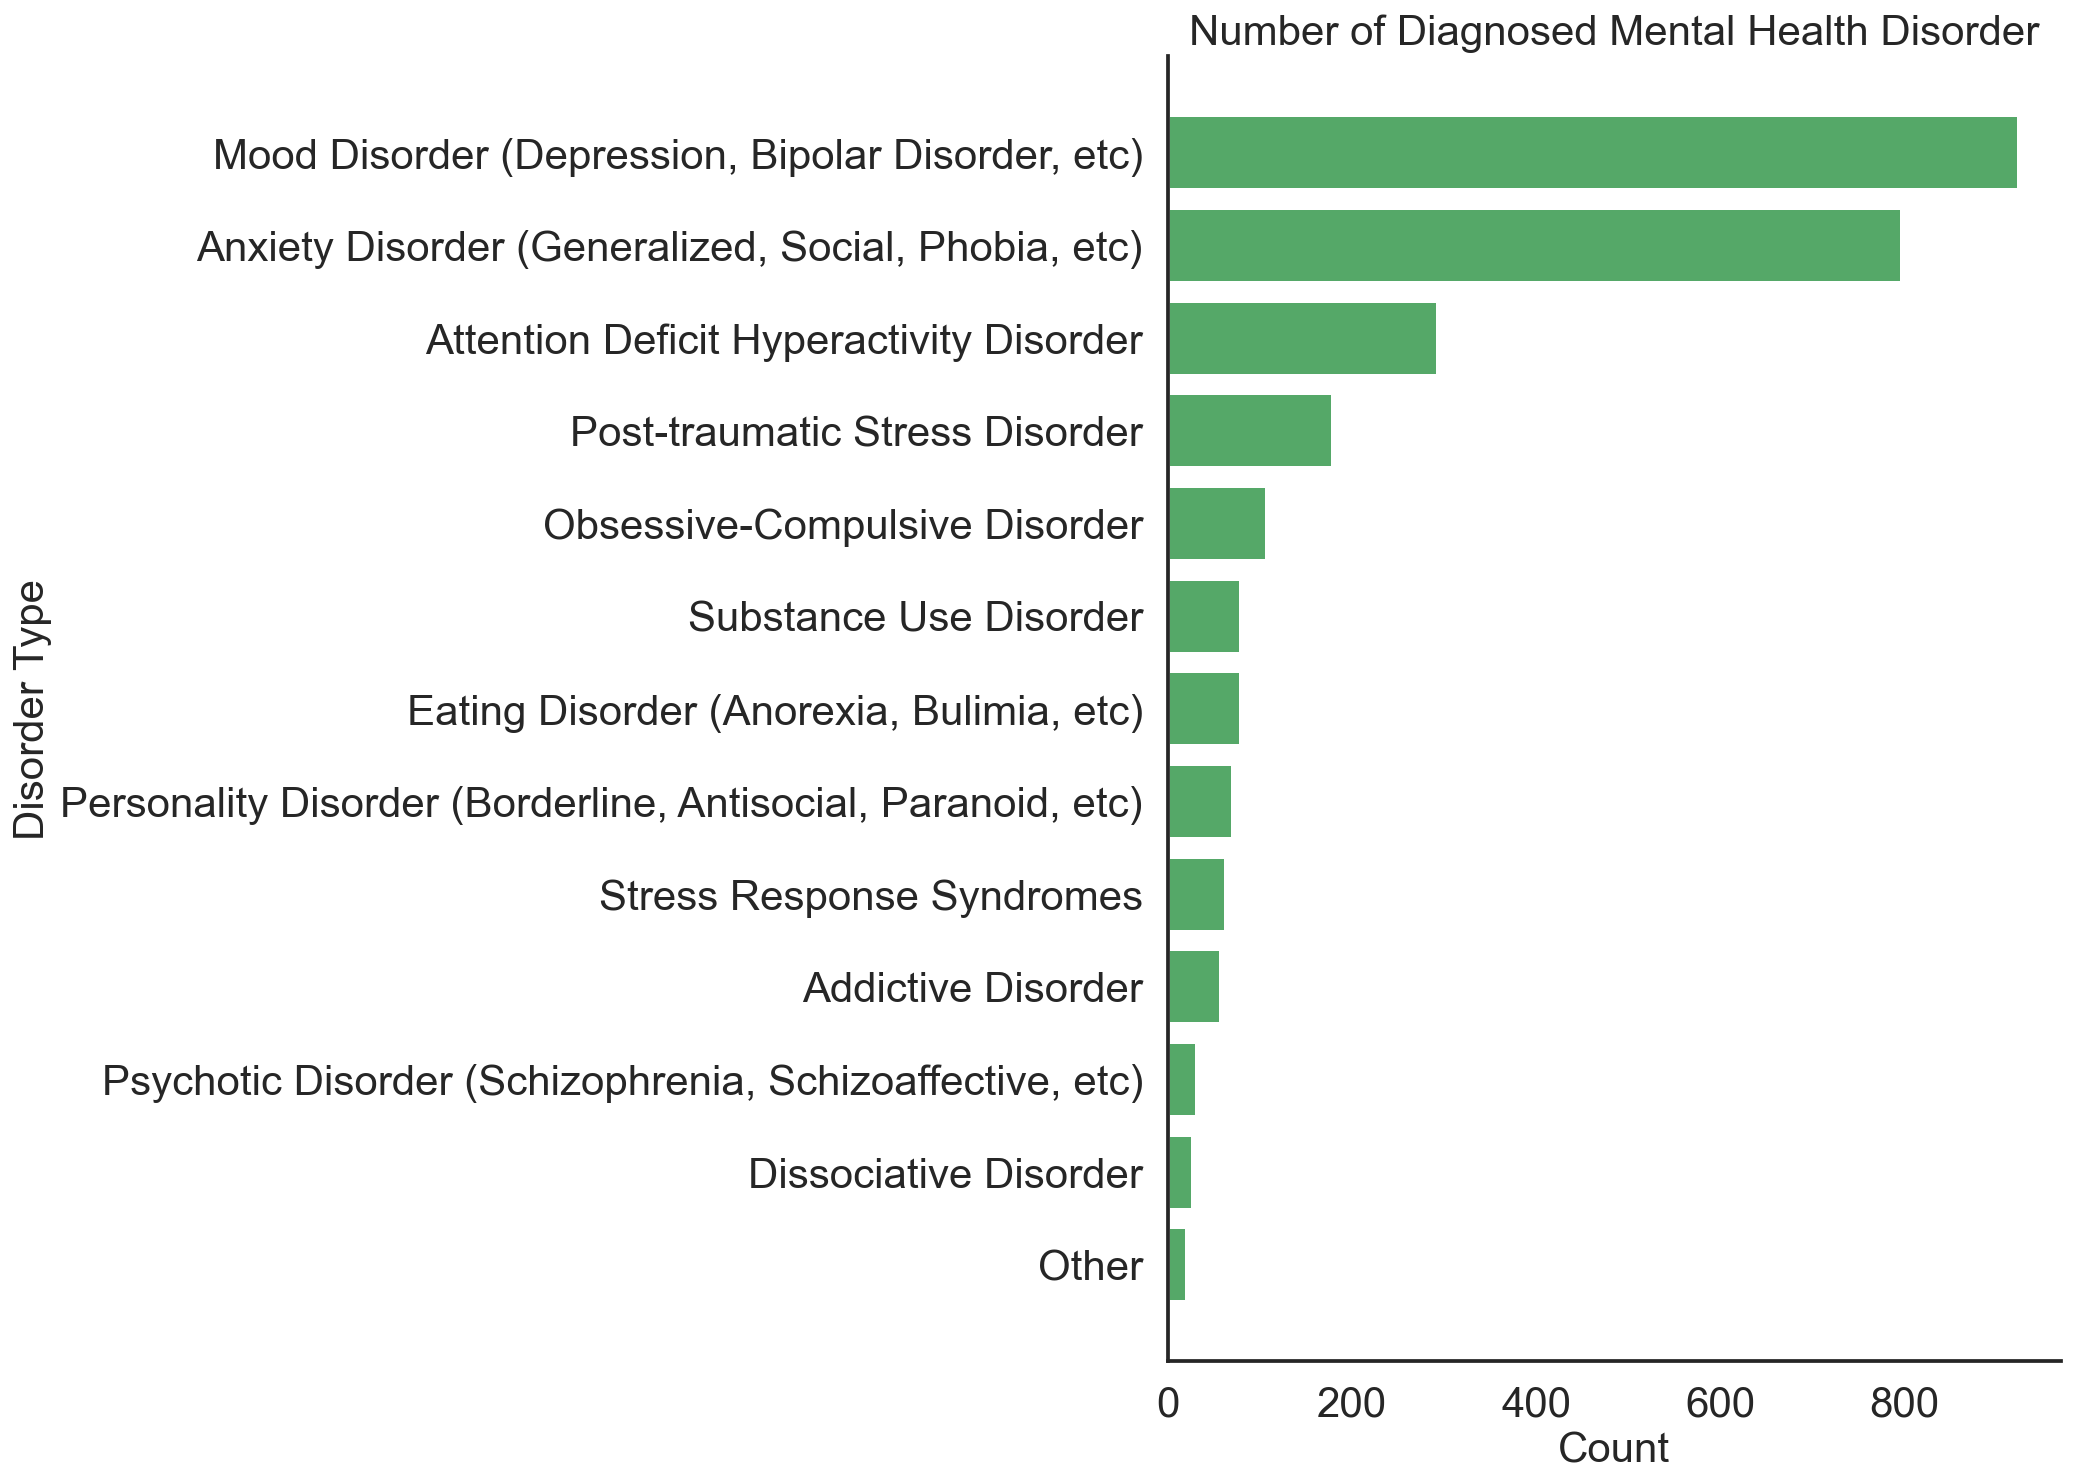

In [4]:
import column_value_count_H
y_name='Disorder Type'
x_name='Count'
p_title='Number of Diagnosed Mental Health Disorder'
column_value_count_H.v_count_plot(cleaning.to_1D(merged_df['diagnosed_mh_disorder']),y_name,x_name,p_title)

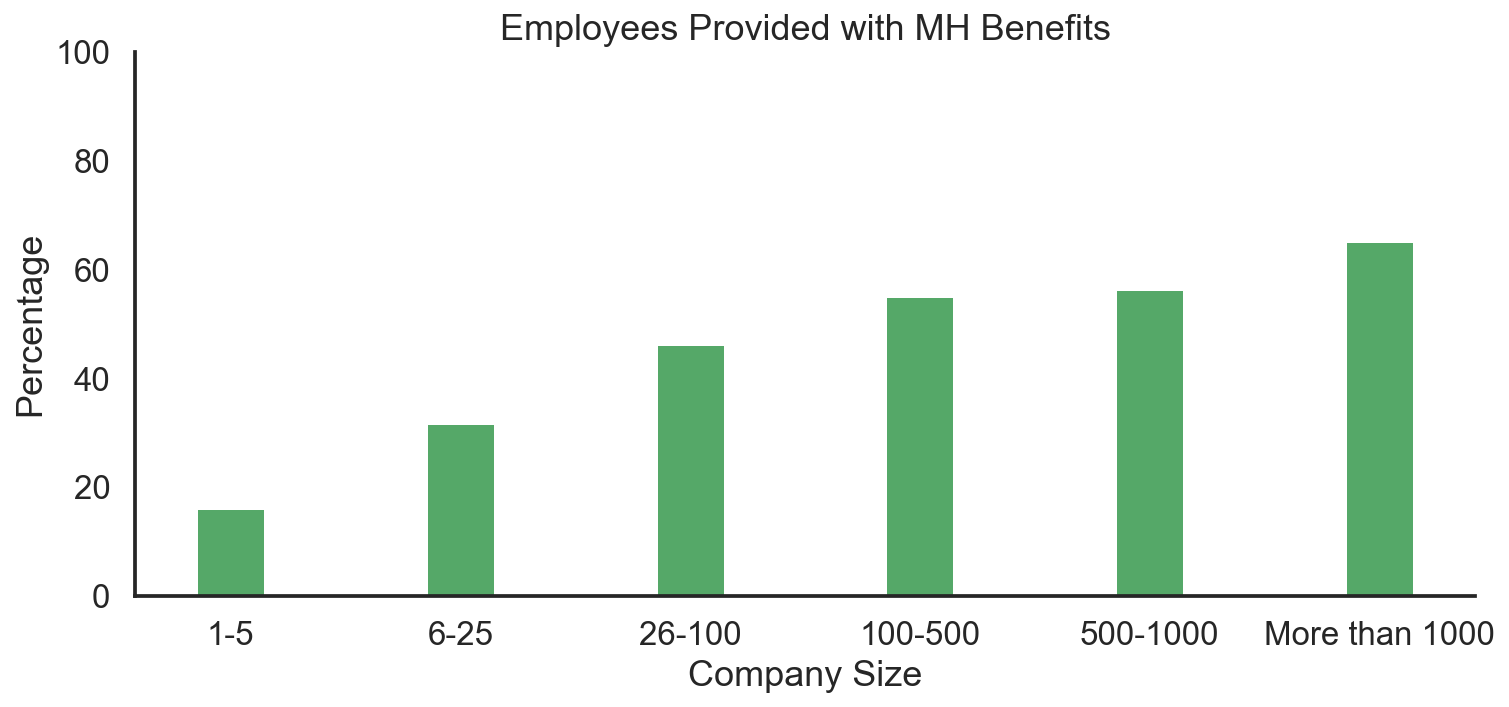

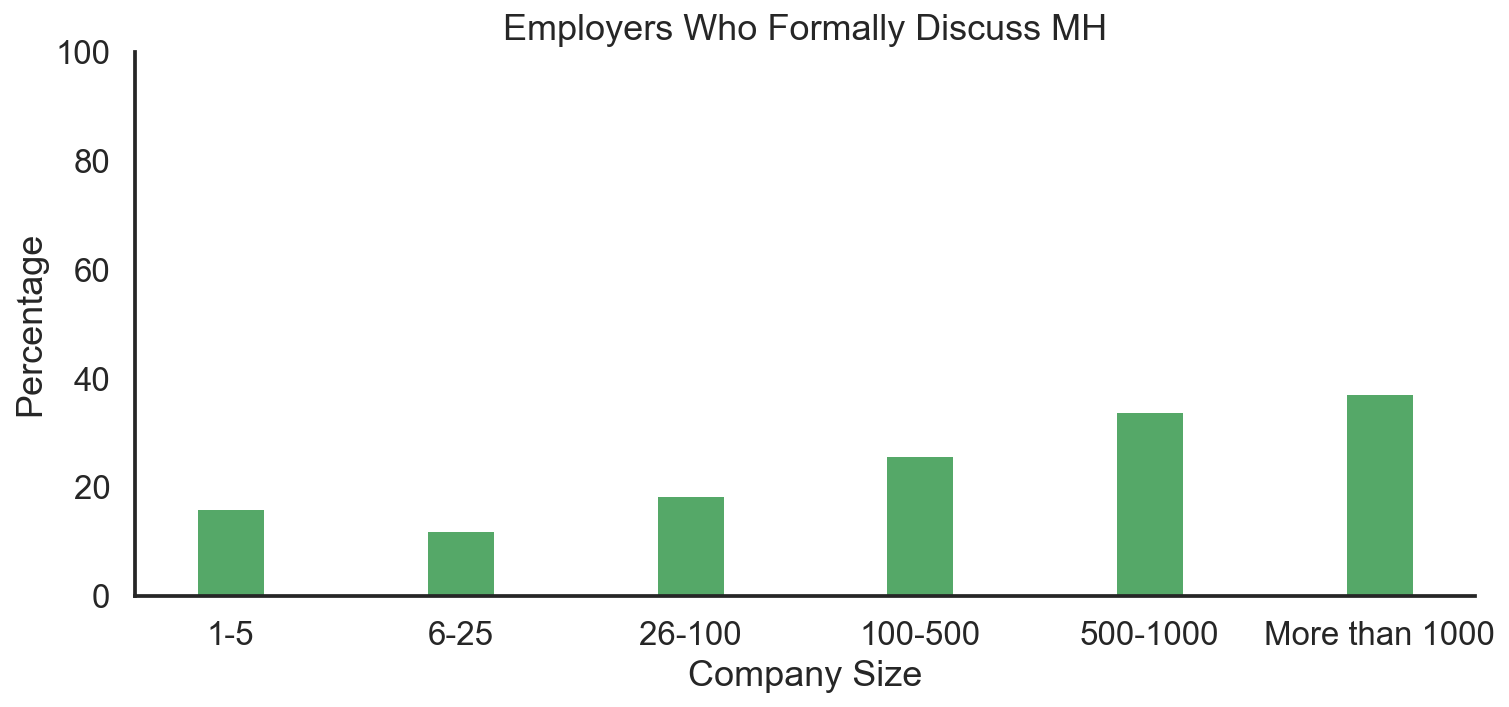

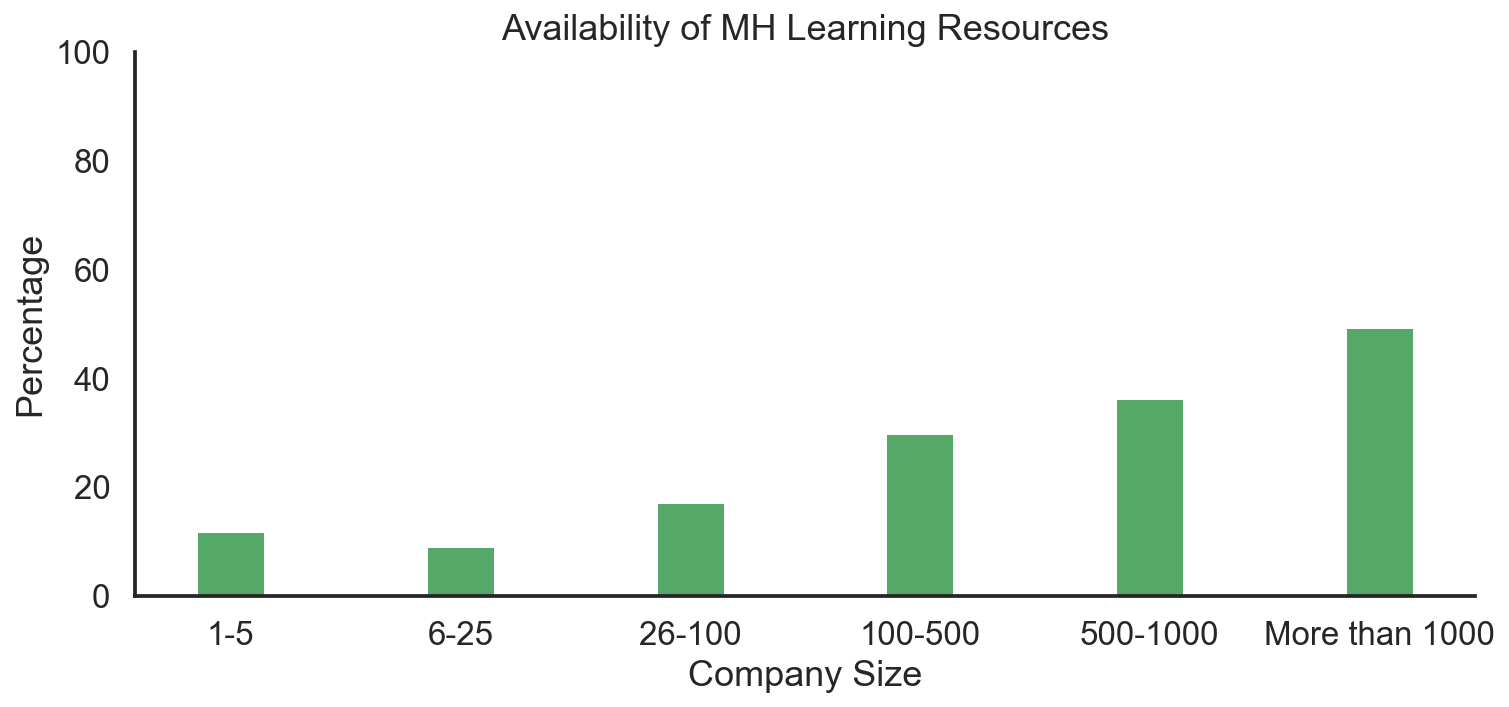

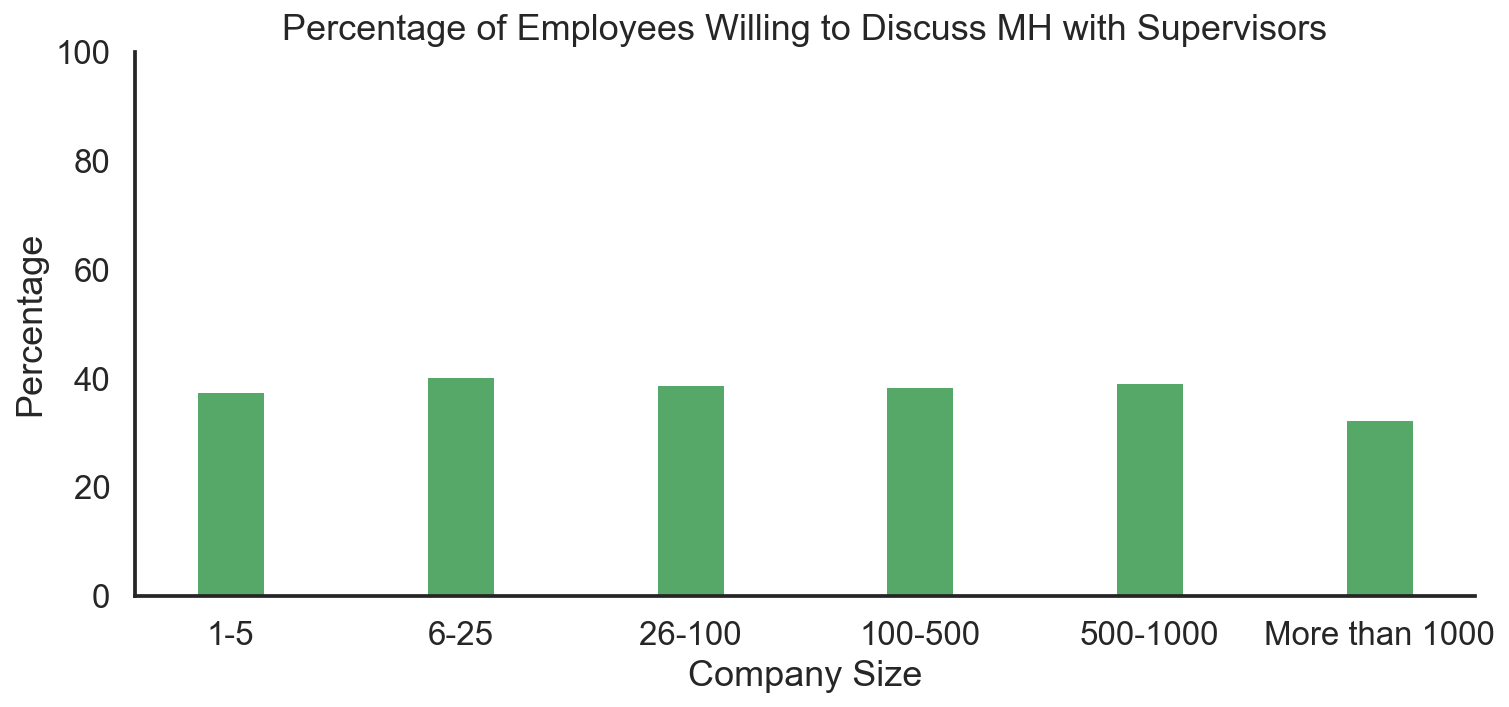

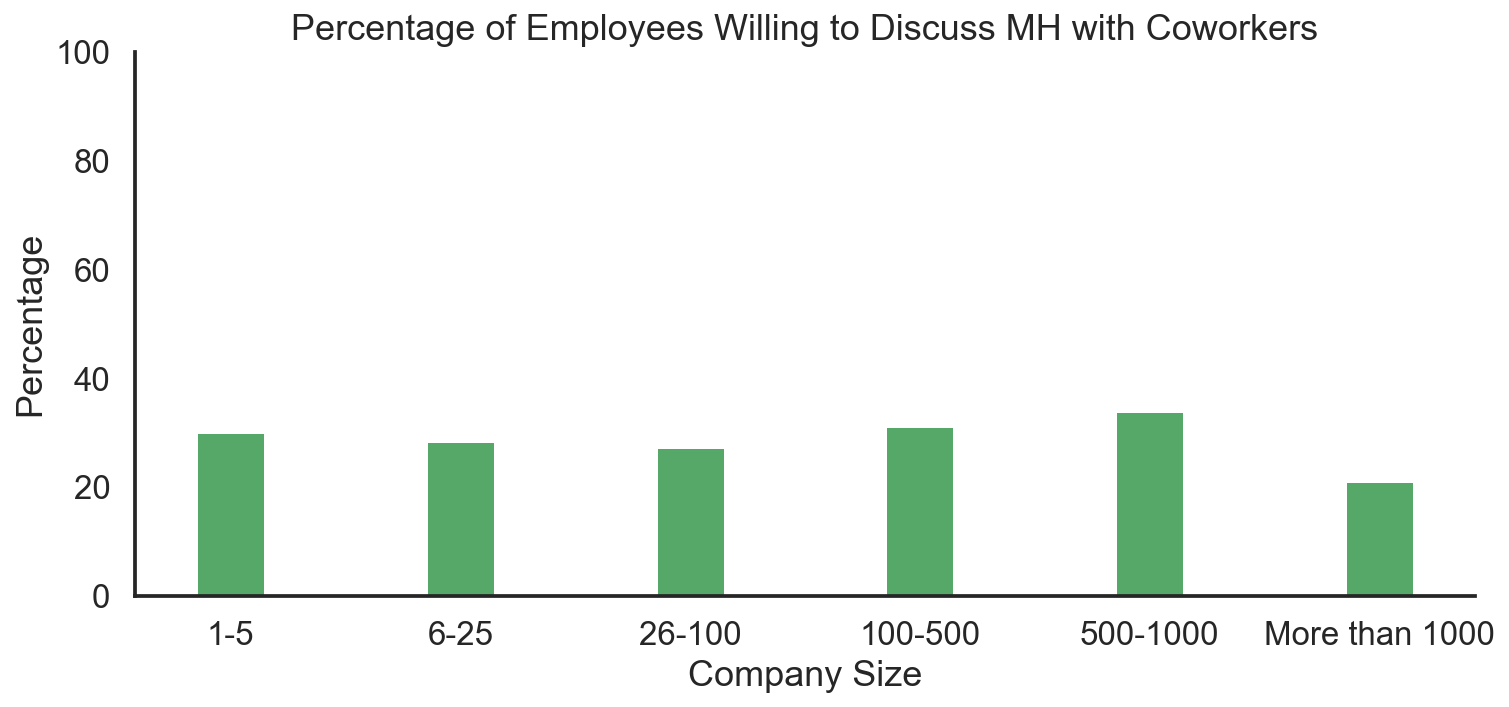

In [5]:
types = ['provide_mh_benefits', 
         'formal_discuss_mh', 
         'offer_mh_learning_resources',
         'discuss_mh_with_supervisor', 
         'discuss_mh_with_coworkers']
titles = ["Employees Provided with MH Benefits",
          "Employers Who Formally Discuss MH",
          "Availability of MH Learning Resources",
          "Percentage of Employees Willing to Discuss MH with Supervisors",
          "Percentage of Employees Willing to Discuss MH with Coworkers"]
import barplot_percentage_vs_size
for i in range(len(types)):
    input_df=merged_df[['employee_count',types[i]]]
    barplot_percentage_vs_size.bar_percent_wrt_company_size(input_df,types[i],2,titles[i])
    #plt.savefig(types[i]+'_vs_size.png',transparent=True,bbox_inches='tight')

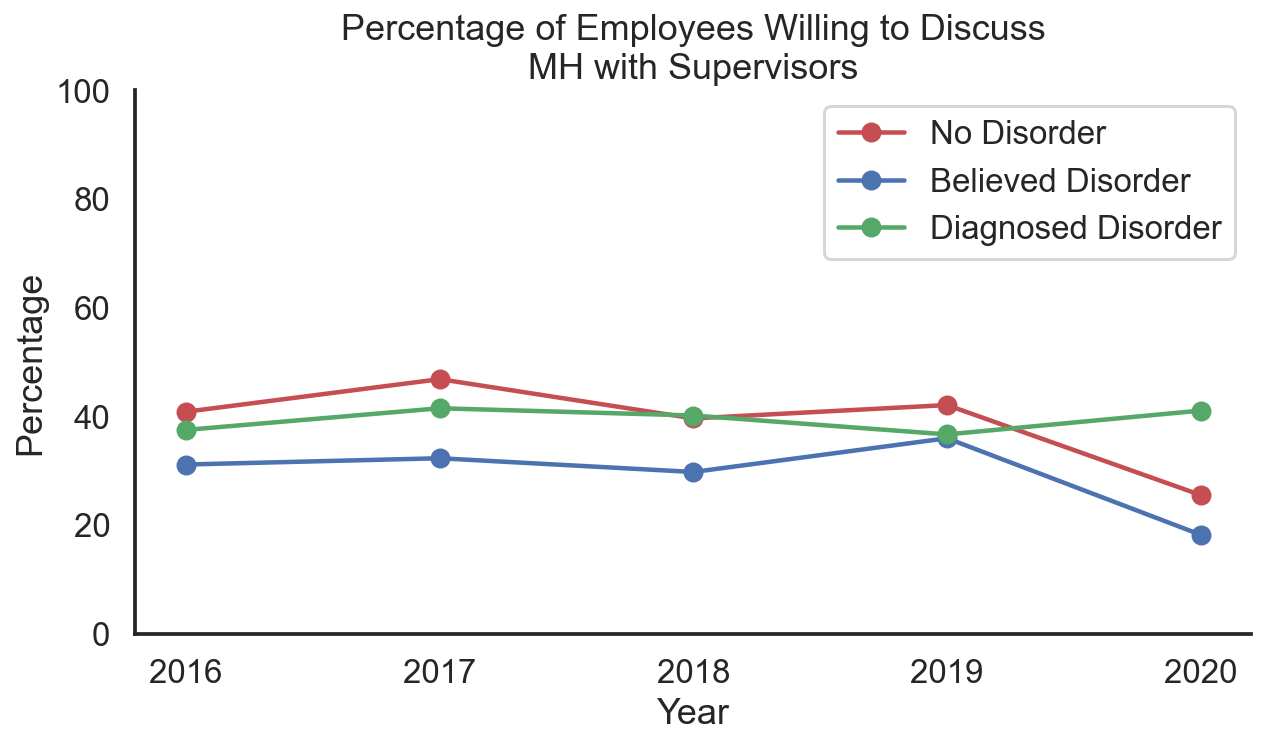

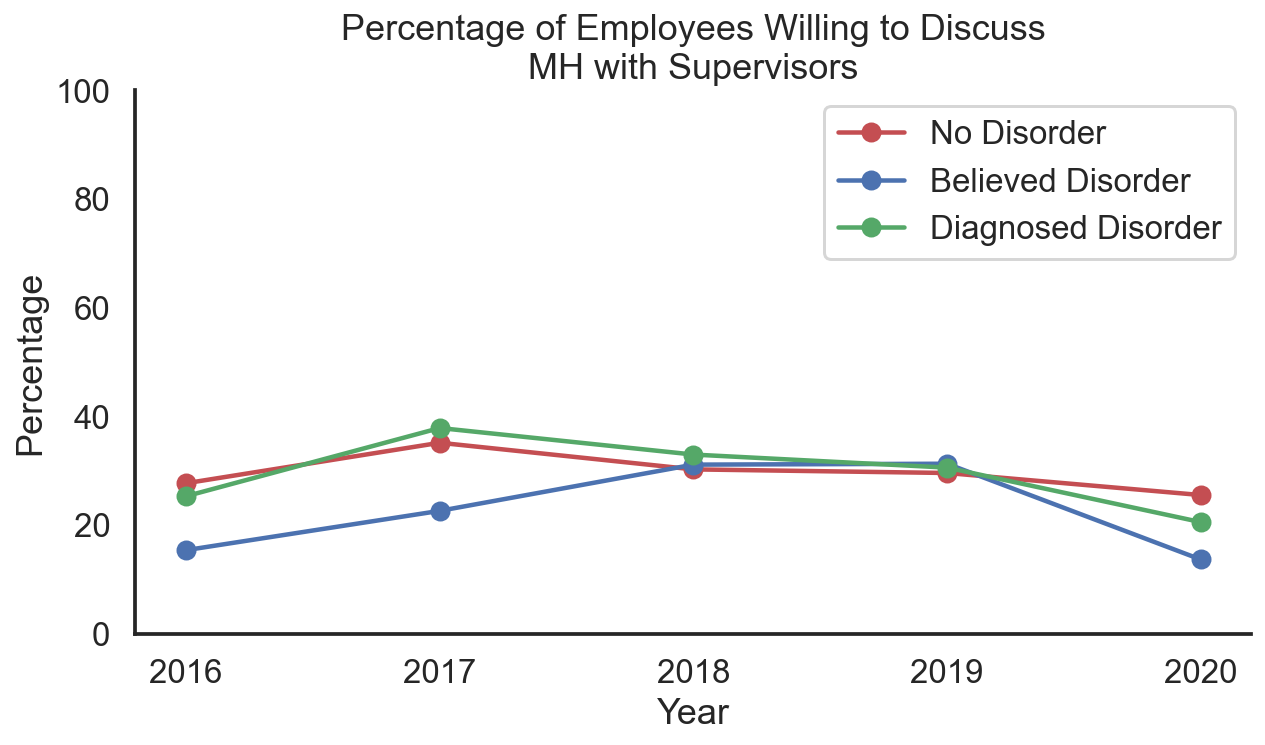

In [6]:
attitude = ['discuss_mh_with_supervisor', 'discuss_mh_with_coworkers']
types = ['No Disorder', 'Believed Disorder', 'Diagnosed Disorder']

import line_percentage_plot_vs_time

input_df=merged_df[['discuss_mh_with_supervisor', 'discuss_mh_with_coworkers','year','has_mh_disorder']]
for i in range(2):
    line_percentage_plot_vs_time.line_plot_time_vs_multi_var(input_df,'has_mh_disorder',attitude[i],[0,2,3],2,types)